# Project: 'Nayyer' Prediction Model for SDAIA

**Describtion:** ML model to predict if the candidate is suitable for the sensitive ML and Data Science career or not.<br>
**Model Type:** Classification model.


## Career Types:
- AI Engineer.
- ML Engineer.
- Data Engineer.
- Data Scientist.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

## (1) Import the dataset:

In [7]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
print(f"Bachelor's: {df['degree_t'].unique()}\n {df['specialisation'].unique()}\n MBA MAX: {df['mba_p'].max()}\n MBA MIN: {df['mba_p'].min()}")

Bachelor's: ['Sci&Tech' 'Comm&Mgmt' 'Others']
 ['Mkt&HR' 'Mkt&Fin']
 MBA MAX: 77.89
 MBA MIN: 51.21


## (2) Clean and prepare the data:

In [9]:
np.random.seed(42)

In [13]:
# (1) delete the index, secondary school related, workex, salary columns:
#df.drop(columns=['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b','hsc_s', 'degree_p', 'workex', 'salary'], inplace=True)

# (2) Rename columns:
df.rename(columns= {'degree_t' : 'bachelors', 'specialisation' : 'master', 'mba_p' : 'degree'}, inplace=True)

# (3.0) change major, MBA, and specialisation values:
df['degree'] = np.random.randint(55.0, 99.0, len(df['degree']))
df['degree'].astype(np.float64)
df['bachelors'] = df['bachelors'].replace({'Others' : 'Sci&Tech'})

# (3.1) write random majors for master:
master_majores = ['AI', 'Data Engineer', 'MBA', 'None']

for i, row in df.iterrows():
    if row['bachelors'] == 'Comm&Mgmt':
        df.loc[i, 'master'] = master_majores[ np.random.randint(2,4)]
    else:
        df.loc[i, 'master'] = master_majores[ np.random.randint(len(master_majores))]
        
for i, row in df.iterrows():
    if row['master'] == 'None':
        df.loc[i, 'degree'] = 0.

# display the dataframe:
df.head()

,gender,bachelors,etest_p,master,degree,status
0,M,Sci&Tech,55.0,AI,93,Placed
1,M,Sci&Tech,86.5,Data Engineer,83,Placed
2,M,Comm&Mgmt,75.0,MBA,96,Placed
3,M,Sci&Tech,66.0,Data Engineer,80,Not Placed
4,M,Comm&Mgmt,96.8,MBA,89,Placed


In [14]:
# (4) create new columns: 'year_experince' at technology career and 'age':
df['year_exp'] = 0
df['age'] = np.random.randint(23, 47, len(df['year_exp']))
for i, row in df.iterrows():
    if row['master'] == 'None':
        df.loc[i, 'year_exp'] = np.random.randint(0,2)
    elif row['master'] == 'AI':
        df.loc[i, 'year_exp'] = np.random.randint(1,5)
    else:
        df.loc[i, 'year_exp'] = np.random.randint(0,7)

# display the dataframe:
df.head()

,gender,bachelors,etest_p,master,degree,status,year_exp,age
0,M,Sci&Tech,55.0,AI,93,Placed,4,35
1,M,Sci&Tech,86.5,Data Engineer,83,Placed,1,35
2,M,Comm&Mgmt,75.0,MBA,96,Placed,2,26
3,M,Sci&Tech,66.0,Data Engineer,80,Not Placed,4,23
4,M,Comm&Mgmt,96.8,MBA,89,Placed,3,39


In [17]:
# (5) change status values to be suitable to new data (1 : placed, 0 : not placed):

for i, row in df.iterrows():
    if int(int(row['master'] != 'None') & row['degree'] > 75):
        df.loc[i, 'status'] = 1 # placed
    elif (int(row['master'] == 'None') & int(row['year_exp'] > 2) & int(row['etest_p'] > 74)):
        df.loc[i, 'status'] = 1 # placed
    elif(row['etest_p'] > 90):
        df.loc[i, 'status'] = 1 # placed
    else:
        df.loc[i, 'status'] = 0 # not placed
        
df ['status'] = df['status'].astype(np.int64)

# display the dataframe:
df.head()

,gender,bachelors,etest_p,master,degree,status,year_exp,age
0,M,Sci&Tech,55.0,AI,93,0,4,35
1,M,Sci&Tech,86.5,Data Engineer,83,0,1,35
2,M,Comm&Mgmt,75.0,MBA,96,0,2,26
3,M,Sci&Tech,66.0,Data Engineer,80,0,4,23
4,M,Comm&Mgmt,96.8,MBA,89,1,3,39


## (3) Add more samples to DataFrame:

In [18]:
# add more smples dataframe (from: 215, to: 5000):

samples = df.sample(n=(6000 - len(df)), replace=True,random_state=23)

# make noise:
num_col = ['etest_p', 'degree', 'year_exp', 'age']

for col in num_col:
    std = df[col].std()
    jitter = np.random.normal(loc=0, scale= 0.05*std, size=(6000 - len(df)))
    samples[col] = (samples[col] + jitter).clip(lower=0, upper=100)

new_df = pd.concat([df, samples], ignore_index=True)

# display the new dataframe + count the classes:
print(new_df.head())
print(new_df['status'].value_counts())

  gender  bachelors  etest_p         master  degree  status  year_exp   age
0      M   Sci&Tech     55.0             AI    93.0       0       4.0  35.0
1      M   Sci&Tech     86.5  Data Engineer    83.0       0       1.0  35.0
2      M  Comm&Mgmt     75.0            MBA    96.0       0       2.0  26.0
3      M   Sci&Tech     66.0  Data Engineer    80.0       0       4.0  23.0
4      M  Comm&Mgmt     96.8            MBA    89.0       1       3.0  39.0
status
0    5284
1     716
Name: count, dtype: int64


## (4) Explore the new dataset (EDA):

In [19]:
# for numric values:
new_df.describe()

,etest_p,degree,status,year_exp,age
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,72.232298,47.770239,0.119333,1.988282,34.767432
std,13.327086,38.150807,0.324207,1.915316,7.213960
min,48.315548,0.000000,0.000000,0.000000,21.835011
25%,60.176057,0.700432,0.000000,0.098356,28.000000
50%,70.854183,64.469855,0.000000,1.094163,35.265935
75%,83.731915,80.534766,0.000000,3.094185,40.955479
max,99.568975,100.000000,1.000000,6.246730,46.845101


In [20]:
# for categorical values:
new_df.describe(exclude='number')

,gender,bachelors,master
count,6000,6000,6000
unique,2,2,4
top,M,Comm&Mgmt,MBA
freq,3938,4017,2544


In [21]:
# comperhensive explore:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     6000 non-null   object 
 1   bachelors  6000 non-null   object 
 2   etest_p    6000 non-null   float64
 3   master     6000 non-null   object 
 4   degree     6000 non-null   float64
 5   status     6000 non-null   int64  
 6   year_exp   6000 non-null   float64
 7   age        6000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 375.1+ KB


## (5) Split the Data:

In [22]:
x = new_df.drop(columns=['status'])
y = new_df['status']

## (6) Encode Categorical Data :

use: ColumnTransformer() function.

In [23]:
from sklearn.compose import ColumnTransformer


oe = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

ct = ColumnTransformer(transformers= [('oe', oe, [0,1]),('ohe', ohe, [3])], remainder='passthrough')

ct_x = ct.fit_transform(x)
feature_list = ct.get_feature_names_out().tolist()


Feature names:
- gender: (1 : Male -- 0 : Female)
- bachelors: (1 : Sci&Tech -- 0 : Comm&Mgmt)
- master__AI
- master__Data Engineer
- master__MBA
- master__None
- remainder__etest_p
- remainder__degree
- remainder__year_exp
- remainder__age

## (7) Draw the relations:

In [24]:
# collect the values in Dataframe:
encoded_df = pd.DataFrame(ct_x, columns=feature_list)
encoded_df['result'] = y
encoded_df.head()

,oe__gender,oe__bachelors,ohe__master_AI,ohe__master_Data Engineer,ohe__master_MBA,ohe__master_None,remainder__etest_p,remainder__degree,remainder__year_exp,remainder__age,result
0,1.0,1.0,1.0,0.0,0.0,0.0,55.0,93.0,4.0,35.0,0
1,1.0,1.0,0.0,1.0,0.0,0.0,86.5,83.0,1.0,35.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,75.0,96.0,2.0,26.0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,66.0,80.0,4.0,23.0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,96.8,89.0,3.0,39.0,1


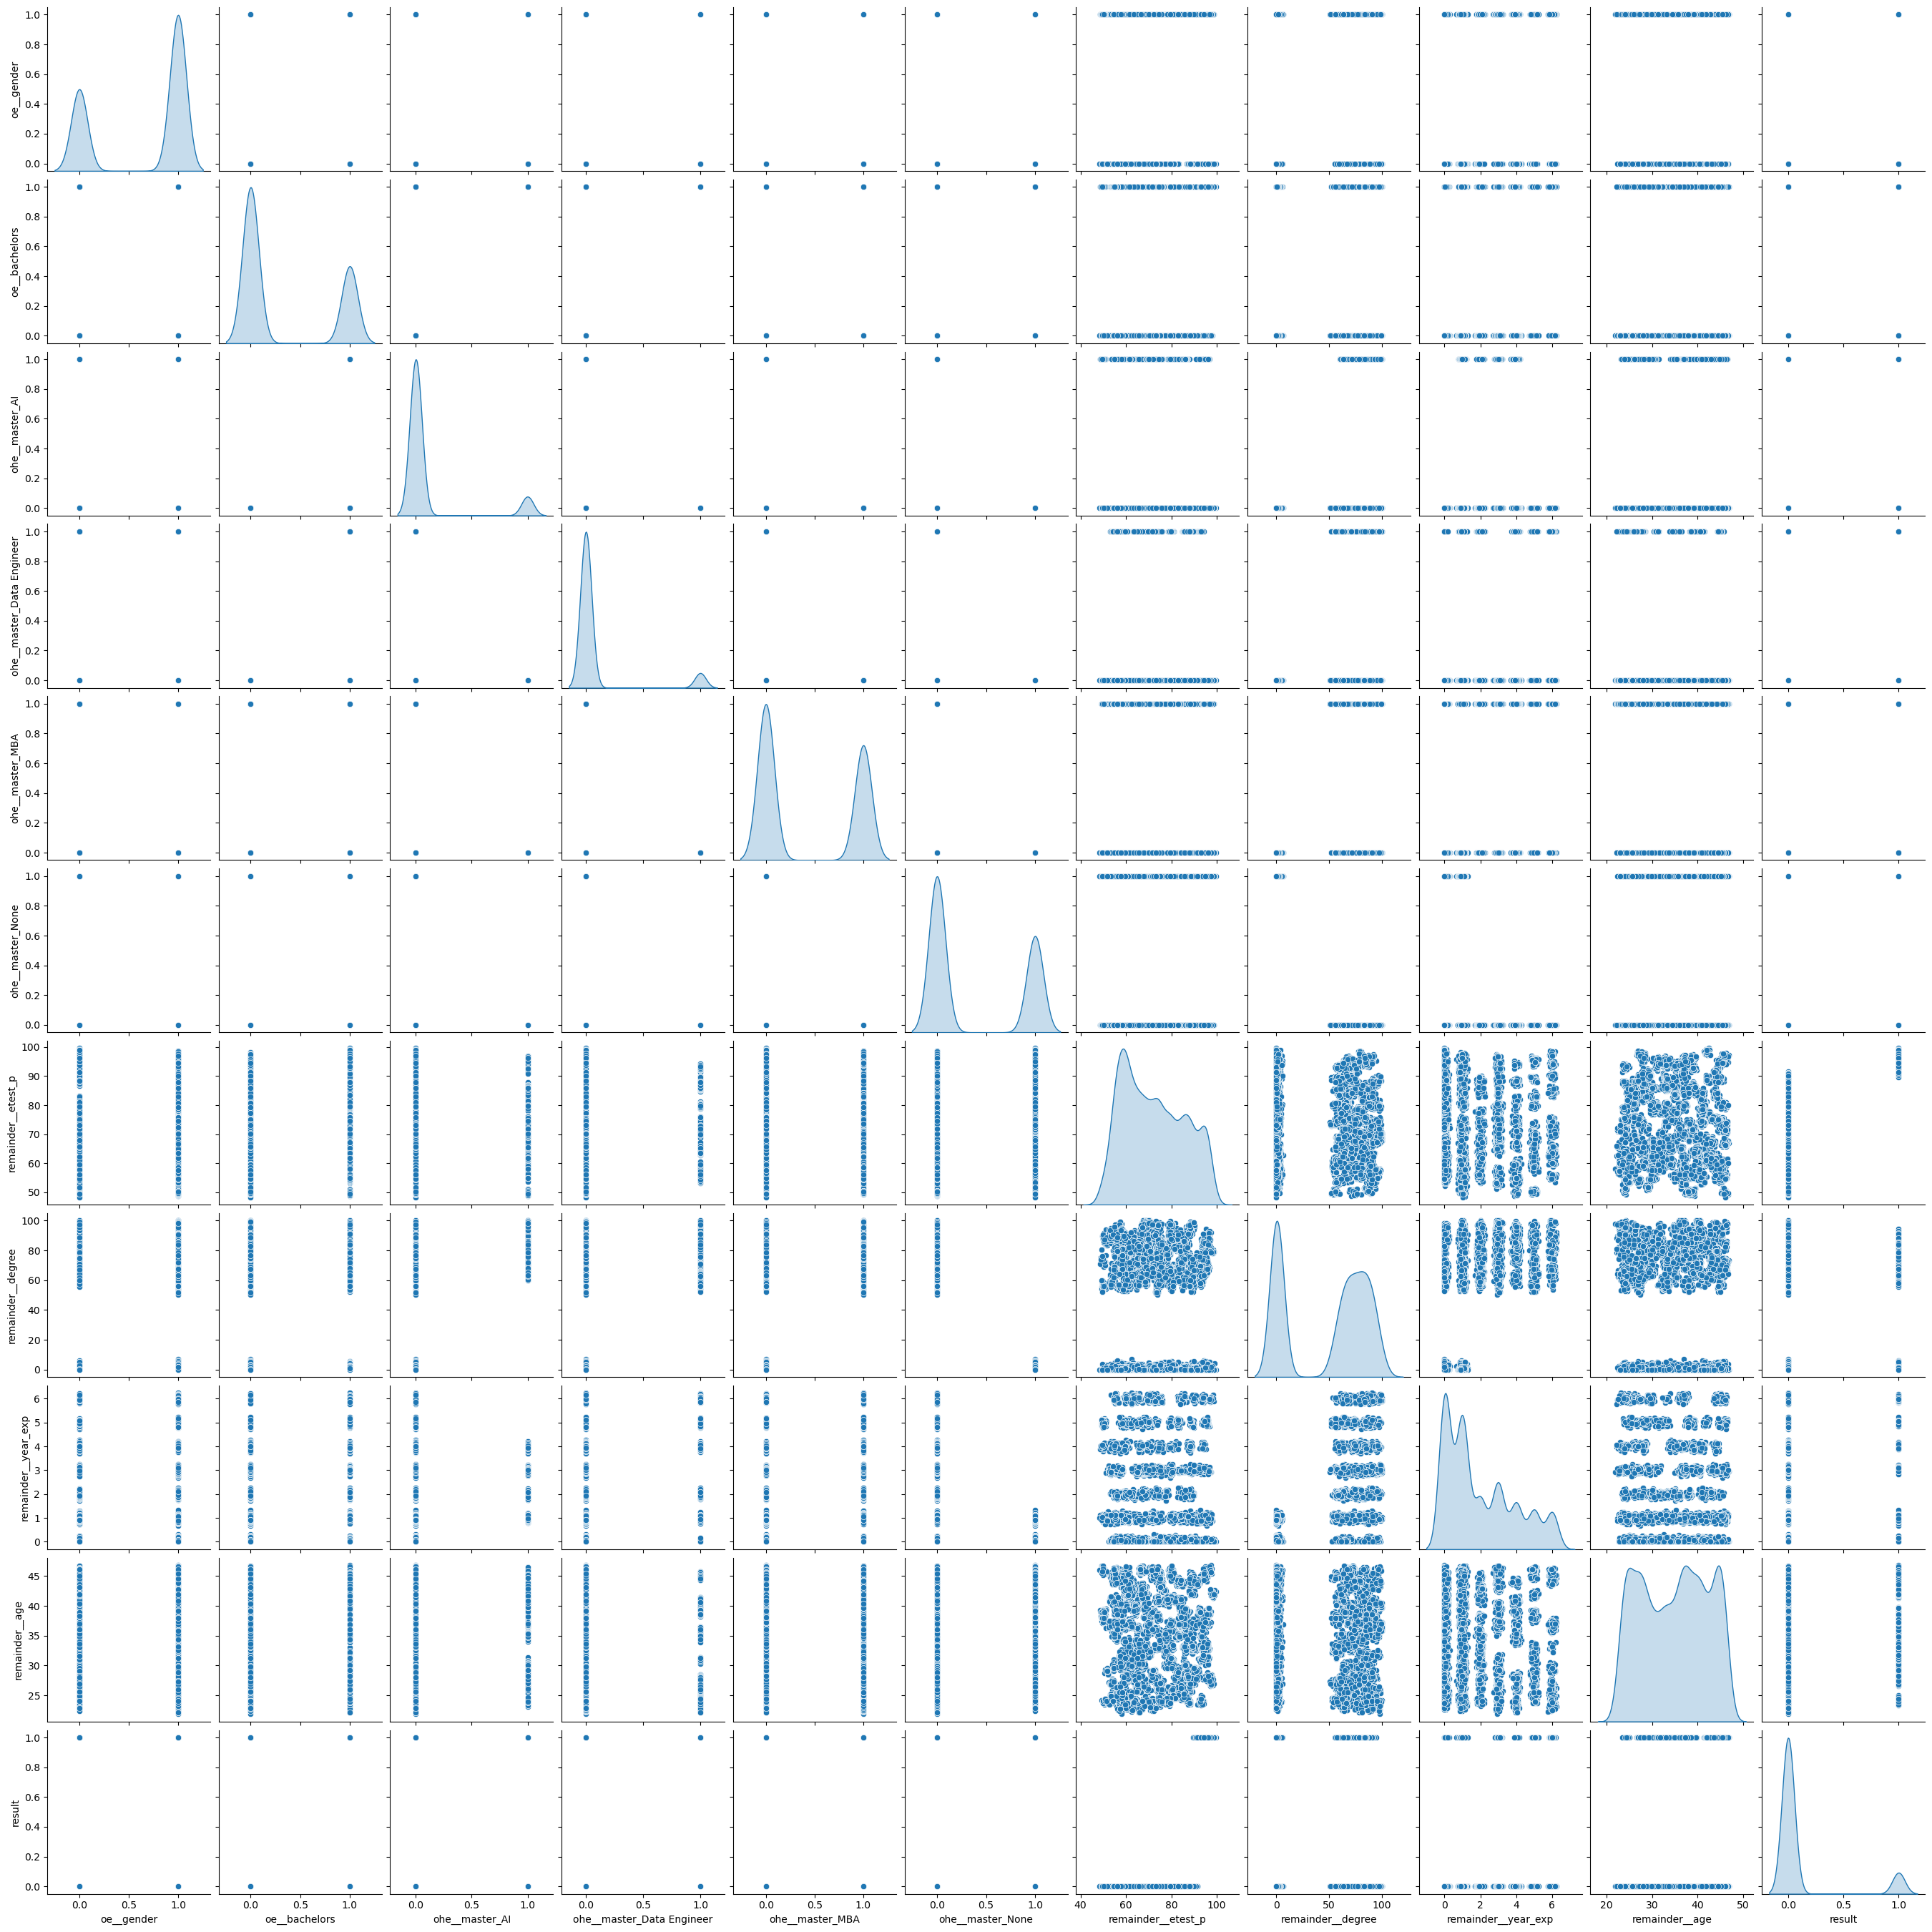

In [25]:
# draw the pairplot:

sn.pairplot(data=encoded_df,diag_kind='kde')
plt.show()

**insights:**
- From the graph we see that the data is non-linear (has no straight line in relationships), so keep this information in mind when <br>
choose the ML algorithm.
- The data have imbalance classification, which will decreace the performance of model predictions to unseen data.

## (8) Dimentional reduction to data:
by 2 methods:
- feature selection; correlation, and chi 2 test, finall using RandomForest.
- feature extraction: use t-SNE; to minimize the dimentions for non-linear data to draw the classification of data (At the final step of project).

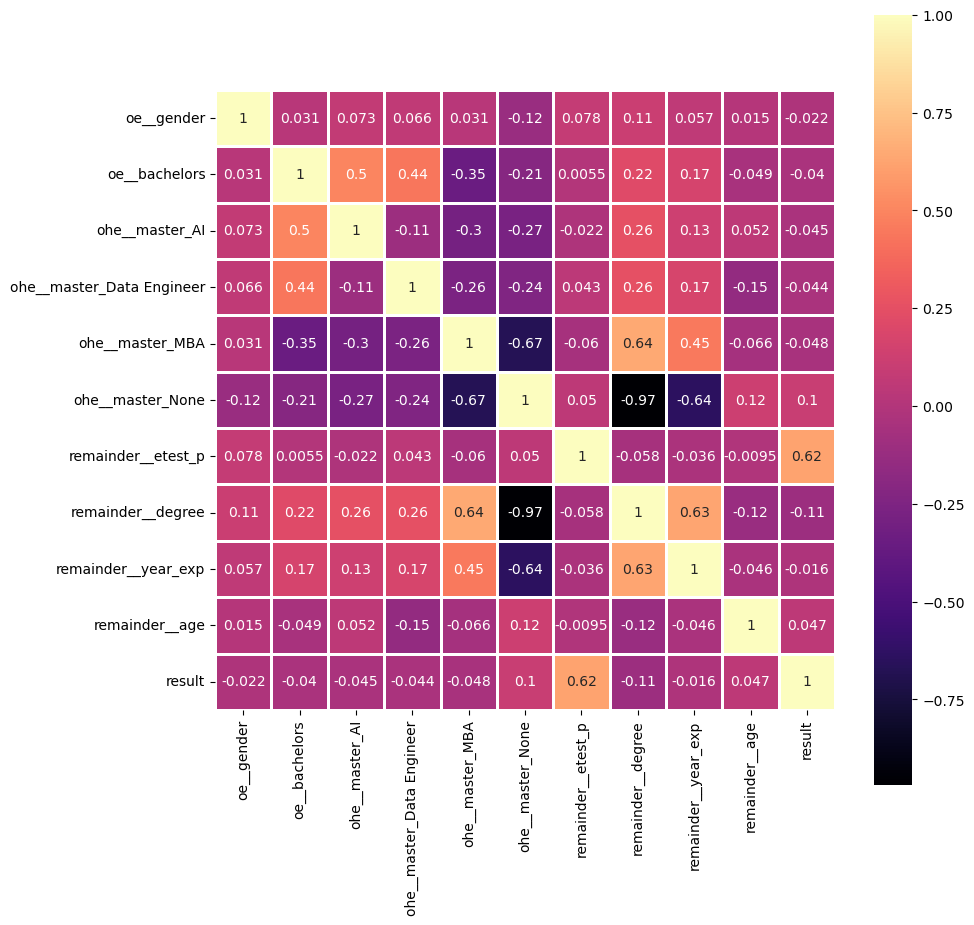

In [26]:
# Correlation:
corr_df = encoded_df.corr()

# draw heatmap:
plt.figure(figsize=(10,10))
sn.heatmap(data=corr_df, annot=True,cmap='magma',linewidths=0.8,square=True)
plt.show()

**insight:**
- From heatmap, we see that the high correlation was between master_MBA and degree, which mean it'will drop one of them; so maybe drop master_MBA.
- If see the relation between degree and master_None it considred as to oppsite, and this is logical relationship, because if you don't take master,<br>
then you won't have a degree for master.

In [27]:
# chi 2 test:
from sklearn.feature_selection import chi2, RFE, SelectKBest

# Just choose categorical columns:
x_chi2, y_chi2 = encoded_df.loc[:, ['oe__gender', 'oe__bachelors', 'ohe__master_AI', 'ohe__master_Data Engineer', 'ohe__master_MBA', 'ohe__master_None']], encoded_df['result']

# choose the best 3 categorical features:
best_cat = SelectKBest(chi2,k=3)
selected_feature_x = best_cat.fit_transform(x_chi2, y_chi2)

# print the results:
print(f'The new shape: {selected_feature_x.shape}\n Feature names: {best_cat.get_feature_names_out()}\n Values: {best_cat.get_support()}')

The new shape: (6000, 3)
 Feature names: ['ohe__master_AI' 'ohe__master_Data Engineer' 'ohe__master_None']
 Values: [False False  True  True False  True]


**The result for categorical selection:**<br>
From the heatmap, we decided to drop master_MBA, but after doing chi2 test.

In [28]:
# use RandomForest:
from sklearn.ensemble import RandomForestClassifier

# split the data:
x_random, y_random = encoded_df.drop(columns=['result']).loc[0:1000, :], encoded_df['result'].loc[0:1000]

# create the model:
random_forest = RandomForestClassifier(n_estimators=180, max_depth=5)
random_forest.fit(x_random, y_random)

dic = {column: random_forest.feature_importances_[i] for i, column in enumerate(x_random.columns)}

print(sorted(dic.items(),key=lambda item: item[1], reverse=True))

[('remainder__etest_p', np.float64(0.8864441885578478)), ('remainder__age', np.float64(0.04218897798541495)), ('remainder__year_exp', np.float64(0.02402476505145597)), ('remainder__degree', np.float64(0.0233350530656141)), ('ohe__master_Data Engineer', np.float64(0.007023355373834698)), ('oe__gender', np.float64(0.0062641651107291415)), ('ohe__master_MBA', np.float64(0.002989860595927318)), ('ohe__master_None', np.float64(0.002989577453046526)), ('ohe__master_AI', np.float64(0.0025554061764910484)), ('oe__bachelors', np.float64(0.002184650629638426))]


**The most important features:**
- etest_p (Job intreview score).
- age.
- degree (degree of master).
- year_exp.
- bachelors.
- master_AI
- master_Data Engineer
- master_MBA
<br><br>
We can see the most important features were numric data.

In [29]:
# Drop ohe__master_None, oe_gender, columns:
droped_df = encoded_df.drop(columns=['oe__gender', 'ohe__master_None'])

## (9) Create the model and train it:

**steps:**

1- Split data to train and test.<br>
2- Standaraizing the data.<br>
3- Create the model.<br>
4- Train the model.<br>
5- Fine-tuning.<br><br>
**note:** use pipline to gather scale data, train, fine-tuning, and make prediction from model.

In [30]:
# (1) split the data:
x, y = droped_df.drop(columns=['result']), droped_df['result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

print(f'Train Size: {x_train.shape[0]} -- Test Size: {x_test.shape[0]}')

Train Size: 4800 -- Test Size: 1200


In [31]:
# check which columns needed for Standraization (numric values):
x.columns.tolist() # [4,5,6,7]

['oe__bachelors',
 'ohe__master_AI',
 'ohe__master_Data Engineer',
 'ohe__master_MBA',
 'remainder__etest_p',
 'remainder__degree',
 'remainder__year_exp',
 'remainder__age']

In [32]:
# (2) Standraizing the numric data:

data_standard = ColumnTransformer(transformers=[('standard2', StandardScaler(), ['remainder__etest_p', 'remainder__degree', 'remainder__year_exp', 'remainder__age'])], remainder='passthrough')

In [33]:
# (3,4,5) create, train, fine-tuning the model(remamber: the data is non-linear):

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

power = np.arange(-4,4,1)
num = [np.power(10, power[i], dtype=np.float64) for i in range(len(power))]

grid_param = {'C' : num, 'gamma' : num, 'kernel' : ['rbf']}
clf = make_pipeline(data_standard, GridSearchCV(estimator=SVC(), param_grid=grid_param, cv=10, verbose=2, refit=True))

clf.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .................C=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ..................C=0.0001, gamma=0.0

D:\Myprograms\anaconda_folder\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard2', StandardScaler(),
                                                  ['remainder__etest_p',
                                                   'remainder__degree',
                                                   'remainder__year_exp',
                                                   'remainder__age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=SVC(),
                              param_grid={'C': [np.float64(0.0001),
                                                np.float64(0.001),
                                                np.float64(0.01),
                                                np.float64(0.1),
                                                np.float64(1.0),
                                                np.float64(10.0),
                                                np.float64(100.0),
                                                np.float64(1000.0)],
                                          'gamma': [np.float64(0.0001),
                                                    np.float64(0.001),
                                                    np.float64(0.01),
                                                    np.float64(0.1),
                                                    np.float64(1.0),
                                                    np.float64(10.0),
                                                    np.float64(100.0),
                                                    np.float64(1000.0)],
                                          'kernel': ['rbf']},
                              verbose=2))])

**Discrebtion of steps:**
<br>
- first: imported functions that needed.
- Second: make a pipeline that holds StandardScale for scale numric values in data, then pass them to GridSearchCV which hold ML algorithm.
- GridSearchCV: used SVC (svm for classification) with **'rbf' kernel** to refit and predict our data well, the reason to choose it because our data is non-linear, so the LogisticRegression is not suitable for that. Then pass multiaple values for 'gamma' and 'C' (inverse Regularization) to **fine-tune** the model with the best hyperparameters.
- Third: train of fit the model using the training data.
- (Cross-Validation) : GridSearchCV has embadded cross-validation in its function, which it will validate the data to give the best predictions, it use 'cv' for number of folds, and verbose for how much information is displayed.

In [34]:
# show the best hyperparametars:
clf.named_steps['gridsearchcv'].best_estimator_

SVC(C=np.float64(1.0), gamma=np.float64(10.0))

## (10) Evaluate the model - first:

In [35]:
from sklearn import metrics

# make predictions:
y_pred = clf.predict(x_test)

# calculate the accuracy score:
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

1.0


In [36]:
# show confiosion matrix:
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[1071,    0],
       [   0,  129]])

**From confiusion matrix and accuracy score:**
- See that our model predict in high quality for now, which equal to 100%, but that is red flag, which mean it can lead to overfitting.

**for test: enter new fake data that already know its classes and see if the model can predict well or is infection by 'overfitting':**


In [37]:
new_test_x = np.array([
    [1, 1, 0, 0, 90, 95, 1, 28, 1],
    [1, 0, 0, 0, 85, 0, 2, 25, 0], 
    [1, 0, 1, 0, 50, 99, 4, 32, 0],
    [1, 0, 0, 0, 70, 0, 4, 32, 0],
    [1, 0, 0, 1, 82, 90, 7, 40, 1],
    [0, 0, 0, 1, 95, 70, 8, 40, 1],
    [0, 0, 0, 0, 51, 0, 6, 32, 0],
    [0, 0, 1, 0, 80, 70, 4, 42, 0],
    [1, 1, 0, 0, 99, 86, 8, 40, 1],
    [1, 0, 0, 0, 95, 0, 2, 23, 1]
])

test_df = pd.DataFrame(new_test_x, columns=droped_df.columns.tolist())
new_test_x = test_df.drop(columns=['result'])
new_test_y = test_df['result']

# predict:
predict_for_overfit = clf.predict(new_test_x)
print(predict_for_overfit)

[0 0 0 0 0 0 0 0 0 0]


**Result:**
- we can determain from result that our model infected by overfitting because imbalance classification, to solve need to oversampling for lower class 1.

## (11) Solve Imbalance Classification by Oversampling:

In [38]:
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
smote = SMOTE(random_state=23,sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)
y_sm.value_counts()

result
0    4213
1    4213
Name: count, dtype: int64

## (12) Create the new model with final Fine-Tuning - Evaluate The model - second:

In [39]:
# create new SVC model with best estimator hyperparameter in the last model:
svm_model = SVC(kernel='rbf', C=1, gamma=10) 

# new pipeline:
svm_pipline = make_pipeline(data_standard, svm_model)

# fit the model with new balanced data:
svm_pipline.fit(x_sm, y_sm)

# make predictions and count the accuaracy score:
y_pred_sm = svm_pipline.predict(x_test)

print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sm))

1.0


In [40]:
# make predictions for the new data:
y_pred_sm = svm_pipline.predict(new_test_x)

print(metrics.accuracy_score(y_true=new_test_y, y_pred=y_pred_sm))

0.5


**From results:**
- let's manipulate new hyperparameters, because the values maybe lead to overfitting.

In [50]:
svm_pipline = make_pipeline(data_standard, SVC(kernel='rbf', C=100, gamma=0.001))

# fit the model
svm_pipline.fit(x_sm, y_sm)

 # make predictions:
y_pred_sm1 = svm_pipline.predict(x_test)

print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sm1))

0.9908333333333333


In [51]:
# make predictions for the new data:
y_pred_sm2 = svm_pipline.predict(new_test_x)

print(metrics.accuracy_score(y_true=new_test_y, y_pred=y_pred_sm2))

0.9


In [52]:
# print confiosion matrix:

metrics.confusion_matrix(new_test_y, y_pred_sm2)

array([[5, 0],
       [1, 4]])

In [49]:
# do cross-val-score:
from sklearn.model_selection import cross_val_score

validation_scores1 = cross_val_score(estimator=svm_pipline, X=x_test, y=y_test, cv=5,scoring='accuracy')
validation_scores2 = cross_val_score(estimator=svm_pipline, X=new_test_x, y=new_test_y, cv=5,scoring='accuracy')

print(f'Accuracy scores for each fold: {validation_scores1}')
print(f'Mean of sscores: {np.mean(validation_scores1)}')
print(f'Accuracy scores for each fold: {validation_scores2}')
print(f'Mean of sscores: {np.mean(validation_scores2)}')

Accuracy scores for each fold: [0.99583333 0.99583333 0.99166667 0.99166667 0.9875    ]
Mean of sscores: 0.9925
Accuracy scores for each fold: [1. 1. 1. 1. 0.]
Mean of sscores: 0.8


In [54]:
# comperhincive evaluation mesures:

print(metrics.classification_report(y_test, y_pred_sm1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1071
           1       0.92      1.00      0.96       129

    accuracy                           0.99      1200
   macro avg       0.96      0.99      0.98      1200
weighted avg       0.99      0.99      0.99      1200



**Result:**
- From the results, the model predict one employee incorrectly as the 'class (1)' and was from the 'class (0)'.

## (13) Visualizing the Data:

In [55]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components=3, perplexity=20)
t_sne_x = t_sne.fit_transform(x_sm)

t_sne_x.shape

(8426, 3)

C:\Users\R1alm\AppData\Local\Temp\ipykernel_13016\1551910285.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tnse_df['result'] = tnse_df['result'].replace({1 : 'Yes', 0 : 'No'})
C:\Users\R1alm\AppData\Local\Temp\ipykernel_13016\1551910285.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(sub['x'], sub['y'], sub['z'], label=label, cmap=colors, alpha=0.5)


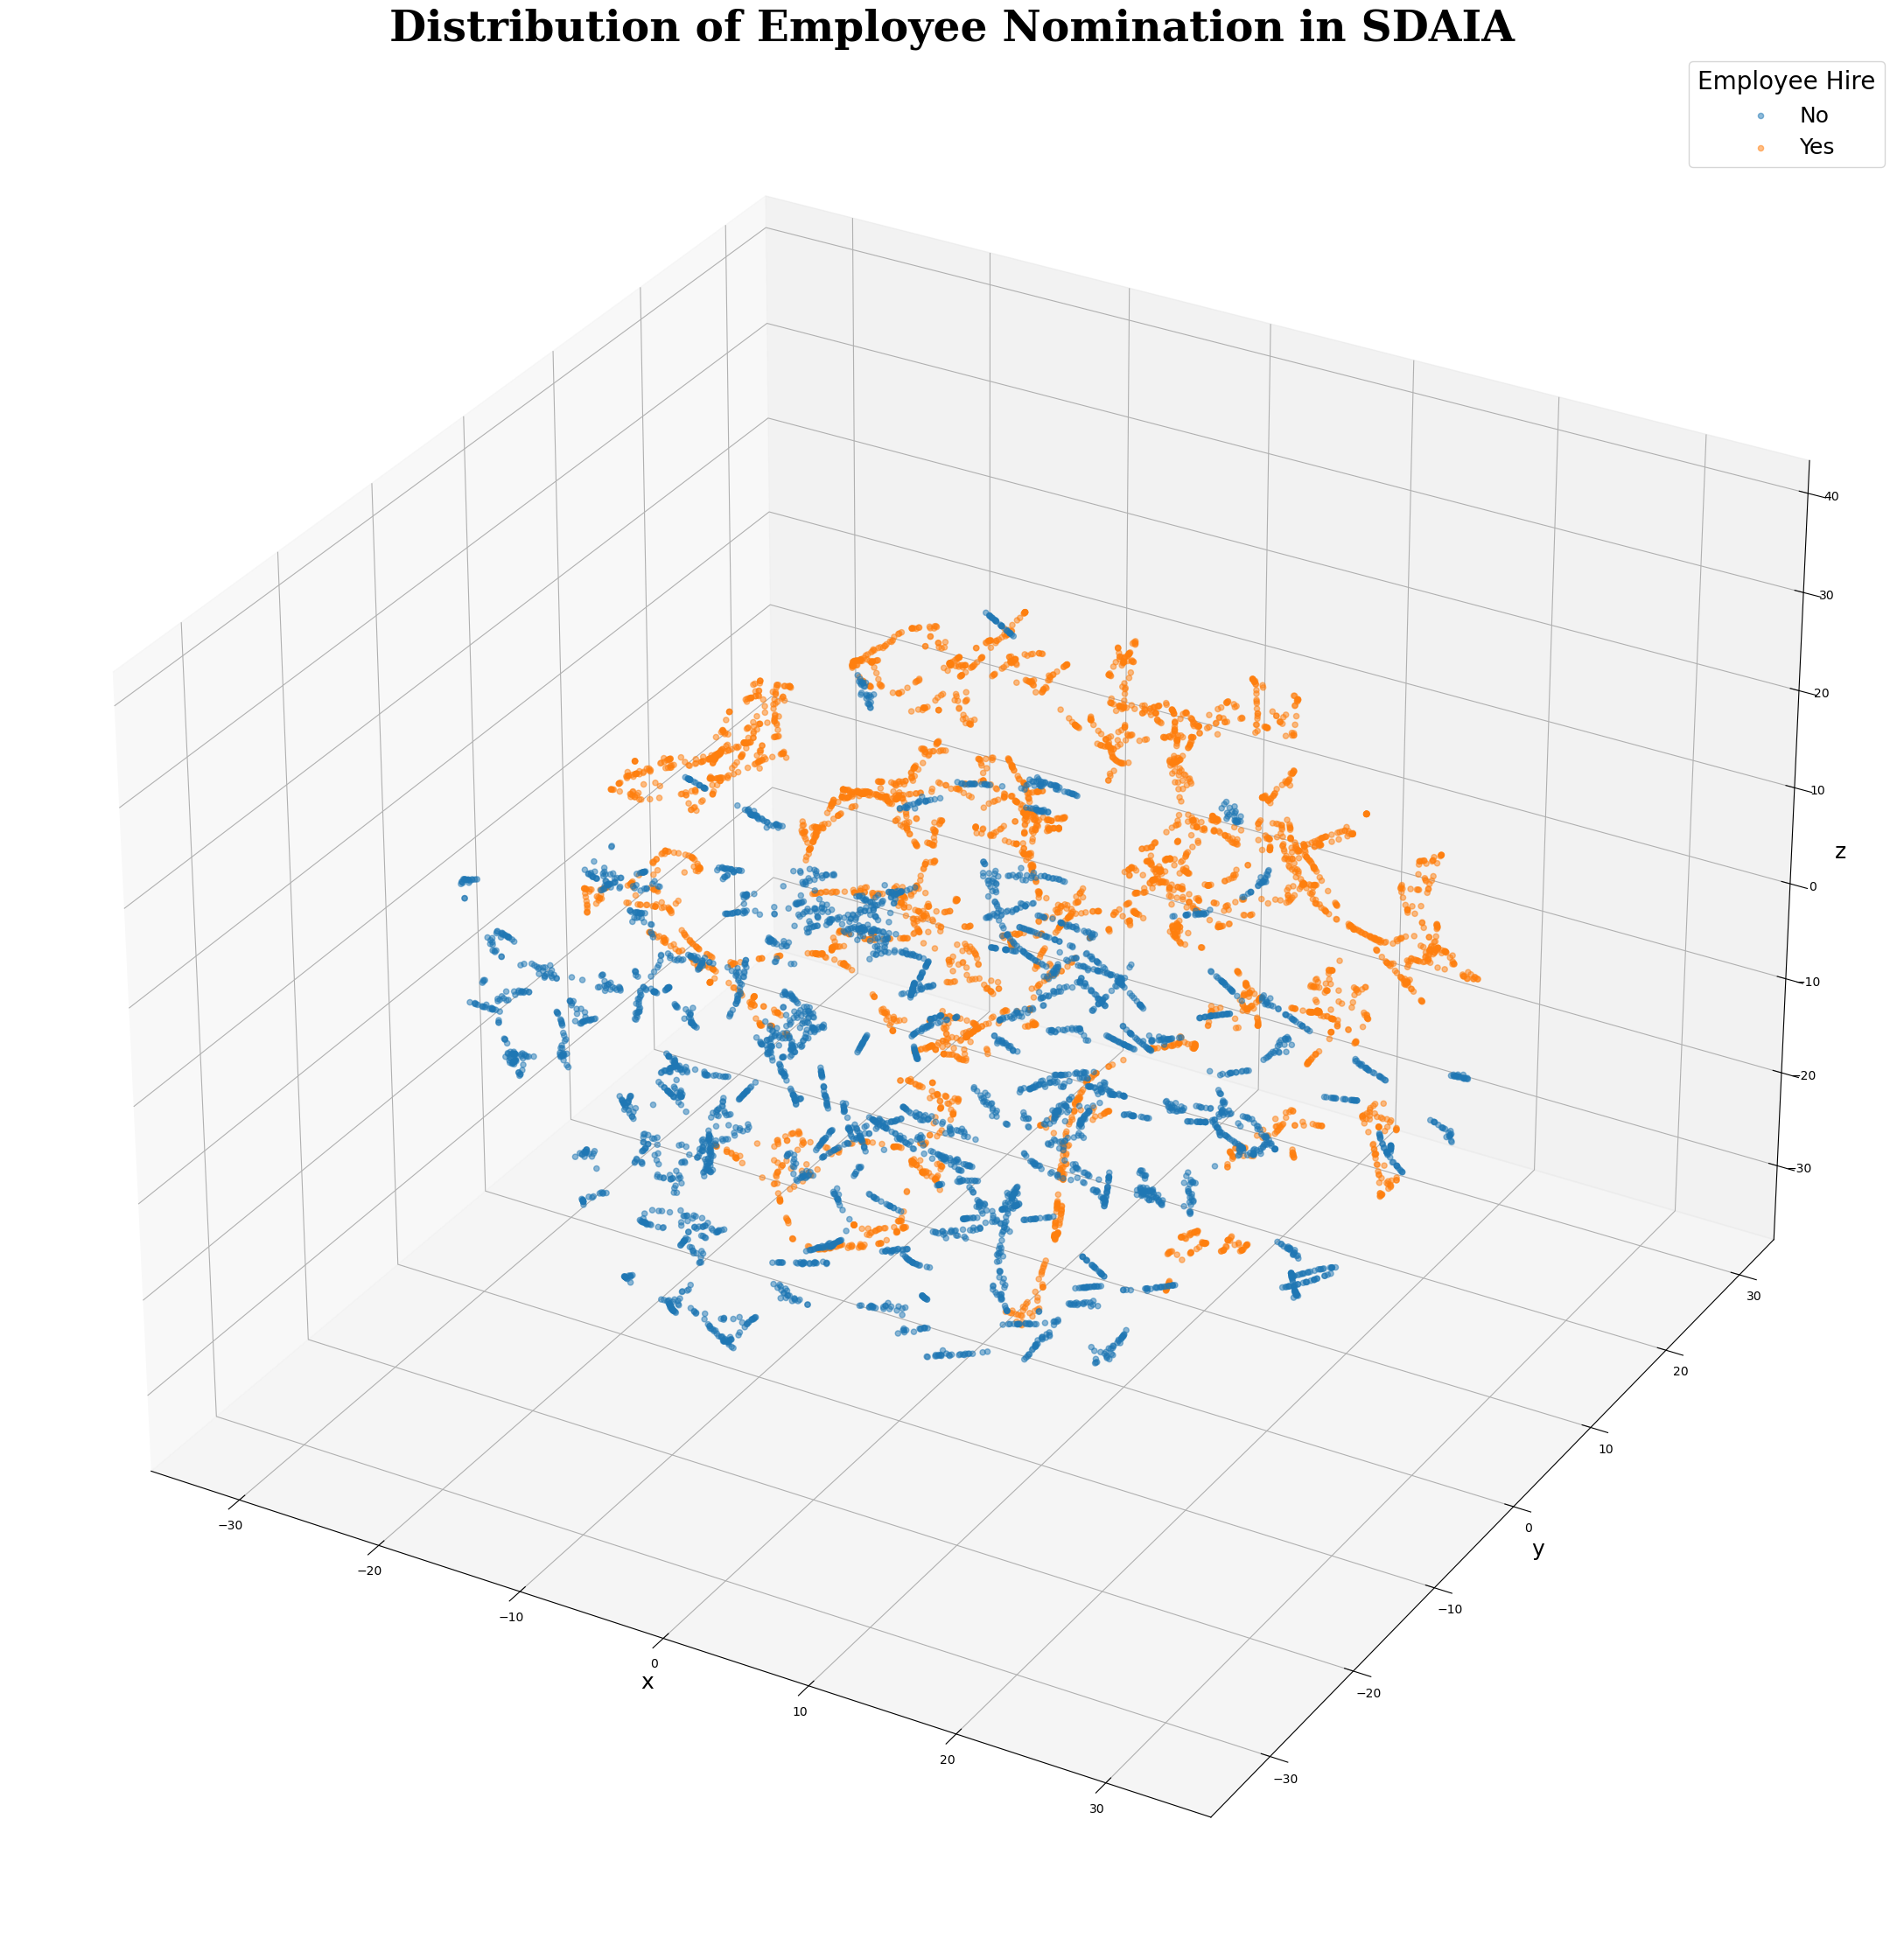

In [56]:
# draw the chart:

tnse_df = pd.DataFrame(t_sne_x, columns=['x','y','z'])
tnse_df['result'] = y_sm
tnse_df['result'] = tnse_df['result'].astype('category')
tnse_df['result'] = tnse_df['result'].replace({1 : 'Yes', 0 : 'No'})

colors = {'Yes' : '#21BCFF', 'No' : '#FB2C36'}

 # the structure of graph:
fig = plt.figure(figsize=(30,28))
ax = fig.add_subplot(111, projection='3d')

# draw the graph with hue:
for label in tnse_df['result'].unique():
    sub = tnse_df[tnse_df['result'] == label]
    ax.scatter(sub['x'], sub['y'], sub['z'], label=label, cmap=colors, alpha=0.5)
    
title_font = {'family': 'serif','color': 'black','size': 35,'weight': 'bold'}
label_font = {'family': 'sans-serif','color': 'black','size': 18}

ax.set_title('Distribution of Employee Nomination in SDAIA', fontdict=title_font)
ax.set_xlabel('x', fontdict=label_font)
ax.set_ylabel('y', fontdict=label_font)
ax.set_zlabel('z', fontdict=label_font)

plt.legend(title='Employee Hire', fontsize=18, title_fontsize=20)
plt.show()